# Random Noise
In this notebook, we will go through some mainstream models of random noise in images, and implement them using NumPy.

Note that noise in real world might have many different PDFs (Probability Density Functions), and not always follow the patterns described below. Also, there are types of noise that are not random, and whose modeling is done differently than what is shown here.

## Section 0. Preparing the Notebook
We start by importing the necessary libraries and then loading a sample image to work on.

In [ ]:
%load_ext autoreload
%autoreload 2

In [82]:
# importing necessary packages
import numpy as np
from numpy import random
import cv2 as cv
from matplotlib import pyplot as plt
from solutions import *
from utils import *

In [ ]:
# loading the sample image and setting the colormap for pyplot
image = np.float64(cv.imread('data/Mercury.bmp', cv.IMREAD_GRAYSCALE) / 255)
plt.set_cmap('Greys_r')
_ = plt.imshow(image), plt.axis('off')

## Section 1. Applying Random Noise to Images
The general equation for application of noise to images, is the summation of image $I$ with a random noise function $\eta$.

$ \hat{I} = I + \eta $

The function $\eta$ is an array of random values, which conform to a certain PDF. For images, it is a good practice to add a clipping function $C_{a,b}$ to the equation, so that the output values are within the acceptable range $[a \; b]$ of image intensities.

$ C_{a,b}(z) = \cases{
a & \text{if $ z \leq a $} \\
z & \text{if $ a < z < b $} \\
b & \text{if $ b \leq z $}
}
$

$
\hat{I} = C_{a,b}(I + \eta)
$

NumPy has built-in implementations for most of the noise models that we use, so there is no need to manually implement them.

### Section 1.1. Salt and Pepper Noise
A simple form of noise is the salt and pepper noise, in which a pixel's intensity is either set to the minimum (black) or the maximum (white) amount, with a probability of $p$. Therefore, in an image with salt and pepper noise, about $\large \frac{p}{2}$ of pixels are turned into black pixels, and $\large \frac{p}{2}$ into white pixels.

In the first glance, this looks like a noise that cannot be modeled using our previously described equation. However, when you consider the clipping function, and that setting a pixel intensity to minimum can be described as adding a large negative value to it, a PDF can be described for the salt and pepper noise. This PDF has the value $\frac{p}{2} \delta(i)$ at $-1$ and $1$ (in the case that our intensity values are within $[0 \; 1]$), and the value $(1-p) \delta{i}$ at 0. You can see a graph of this PDF below.

In [ ]:
drawSNPPDF(resolution=100, p=.25)

Now implement a function which applies salt & pepper noise to a sample image. You can either use the probabilistic model described above, or a method of you own choice.

**Note:** The expected value for the sum of salt and pepper pixels in your output should be equal.

In [ ]:
def addSNPNoise(image : np.ndarray, p : float) -> np.ndarray:
    """
    Parameters:
    - image : np.ndarray
        An image on which the Salt & Pepper noise will be applied. It should be a
        np.ndarray with dtype=float64, and with values within [0 1].
    - p : float [0 1]
        The p parameter in the S&P noise distribution. Should be in [0 1].
    Returns:
    - output : np.ndarray
        The noisy image, with dtype=np.float64, and values within [0 1].
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

# Adding S&P noise
p = 0.25
image_snp = addSNPNoise(image, p)
image_snp_ref = addSNPNoiseRef(image, p)

# Showing the results
_ = plt.figure(figsize=(18, 6))
_ = plt.subplot(1, 3, 1), plt.imshow(image_snp, vmin=0, vmax=1), plt.axis('off'), plt.title('Your Salt & Pepper Noise')
_ = plt.subplot(1, 3, 2), plt.imshow(image_snp_ref, vmin=0, vmax=1), plt.axis('off'), plt.title('Reference Salt & Pepper Noise')
_ = plt.subplot(1, 3, 3), plt.imshow(image, vmin=0, vmax=1), plt.axis('off'), plt.title('Original image')

There is also a possibility that an image contains only salt or only pepper noise, i.e. has some pixels flipped to black or white with the probability $p$. Implement functions for these types of noise as well.

In [ ]:
def addSaltNoise(image : np.ndarray, p : float) -> np.ndarray:
    """
    Parameters:
    - image : np.ndarray
        An image on which the salt noise will be applied. It should be a np.ndarray
        with dtype=float64, and with values within [0 1].
    - p : float [0 1]
        The p parameter in the salt noise distribution. Should be in [0 1].
    Returns:
    - output : np.ndarray
        The noisy image, with dtype=np.float64, and values within [0 1].
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

def addPepperNoise(image : np.ndarray, p : float) -> np.ndarray:
    """
    Parameters:
    - image : np.ndarray
        An image on which the pepper noise will be applied. It should be a
        np.ndarray with dtype=float64, and with values within [0 1].
    - p : float [0 1]
        The p parameter in the pepper noise distribution. Should be in [0 1].
    Returns:
    - output : np.ndarray
        The noisy image, with dtype=np.float64, and values within [0 1].
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

# Adding S&P noise
p = 0.1
image_salt = addSaltNoise(image, p)
image_salt_ref = addSaltNoiseRef(image, p)
image_pepper = addPepperNoise(image, p)
image_pepper_ref = addPepperNoiseRef(image, p)

# Showing the results
_ = plt.figure(figsize=(15, 15))
_ = plt.subplot(2, 2, 1), plt.imshow(image_salt, vmin=0, vmax=1), plt.axis('off'), plt.title('Your Salt Noise')
_ = plt.subplot(2, 2, 2), plt.imshow(image_salt_ref, vmin=0, vmax=1), plt.axis('off'), plt.title('Reference Salt Noise')
_ = plt.subplot(2, 2, 3), plt.imshow(image_pepper, vmin=0, vmax=1), plt.axis('off'), plt.title('Your Pepper Noise')
_ = plt.subplot(2, 2, 4), plt.imshow(image_pepper_ref, vmin=0, vmax=1), plt.axis('off'), plt.title('Reference Pepper Noise')

### Section 1.2. Uniform Noise
Another form of noise is uniform noise, where the noise is a random value in the interval $(a\;b)$. Depending on the situation, you can assume that this interval is centered on $0$, and therefore the interval can be described as $[-a\;a]$. The intensity of this type of noise, and the data corruption that it causes, can be described by how close the magnitudes of $a$ and $b$ are to the maximum value for pixel intensity.

You can see a representation of the PDF for a uniform noise function below.

In [ ]:
drawUniformPDF(resolution=100, a=-.25, b=.25)

Now implement a uniform noise function. Note that you can use the functions in NumPy's numpy.random module.

In [ ]:
def addUniformNoise(image : np.ndarray, a : float, b : float) -> np.ndarray:
    """
    Parameters:
    - image : np.ndarray
        An image on which the Uniform noise will be applied. It should be a
        np.ndarray with dtype=float64, and with values within [0 1].
    - a : float [-1 1]
        The a parameter in the Uniform noise distribution. Should be in [-1 1].
    - b : float [-1 1]
        The b parameter in the Uniform noise distribution. Should be in [-1 1].
    Returns:
    - output : np.ndarray
        The noisy image, with dtype=np.float64, and values within [0 1].
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

# Adding Uniform noise
a = -.25
b = .25
image_uniform = addUniformNoise(image, a, b)
image_uniform_ref = addUniformNoiseRef(image, a, b)

# Showing the results
_ = plt.figure(figsize=(18, 6))
_ = plt.subplot(1, 3, 1), plt.imshow(image_uniform, vmin=0, vmax=1), plt.axis('off'), plt.title('Your Uniform Noise')
_ = plt.subplot(1, 3, 2), plt.imshow(image_uniform_ref, vmin=0, vmax=1), plt.axis('off'), plt.title('Reference Uniform Noise')
_ = plt.subplot(1, 3, 3), plt.imshow(image, vmin=0, vmax=1), plt.axis('off'), plt.title('Original image')

### Section 1.3. Gaussian Noise
Gaussian noise is the kind of noise where the noise value PDF is a normal (a.k.a Gaussian) function. Gaussian noise can be a good approximation for the many types of noise, which have a symmetrical distribution. You are most likely already familiar with the normal distribution, however, for very bright or dark pixels, or for large $\sigma$ values, we might encounter intensity clipping, which would cause the actual PDF to be slightly different from the normal distribution. Implement a Gaussian noise function and see its effects on the sample image.

**Note 1:** If you're not familiar with the normal distribution, you can read more [here](en.wikipedia.org/wiki/Normal_distribution). Also you should probably learn some more about probability and statistics to better understand this notebook.

**Note 2:** A good way of translating the $\sigma$ into noise intensity, is by considering that about $95\%$ of noise values are within $[-2\sigma \; 2\sigma]$

In [ ]:
def addGaussianNoise(image : np.ndarray, sigma : float) -> np.ndarray:
    """
    Parameters:
    - image : np.ndarray
        An image on which the Gaussian noise will be applied. It should be a
        np.ndarray with dtype=float64, and with values within [0 1].
    - sigma : float [0 inf)
        The sigma parameter in the Gaussian noise distribution. Should be in [0 inf).
    Returns:
    - output : np.ndarray
        The noisy image, with dtype=np.float64, and values within [0 1].
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

# Adding Gaussian noise
sigma = .25
image_gaussian = addGaussianNoise(image, sigma)
image_gaussian_ref = addGaussianNoiseRef(image, sigma)

# Showing the results
_ = plt.figure(figsize=(18, 6))
_ = plt.subplot(1, 3, 1), plt.imshow(image_gaussian, vmin=0, vmax=1), plt.axis('off'), plt.title('Your Gaussian Noise')
_ = plt.subplot(1, 3, 2), plt.imshow(image_gaussian_ref, vmin=0, vmax=1), plt.axis('off'), plt.title('Reference Gaussian Noise')
_ = plt.subplot(1, 3, 3), plt.imshow(image, vmin=0, vmax=1), plt.axis('off'), plt.title('Original image')

### Section 1.4. Rayleigh Noise
Rayleigh noise is different from the previous types of noise, as its PDF is not centered at 0, and the density curve is assymetrical and skewed to the right. The PDF for Rayleigh distribution is as follows.

$
p_{\sigma}(z) = 
\begin{cases}
0 & \text{if $ z < 0 $} \\
\Large \frac{z}{\sigma^2} \large e^{-z^2/(2\sigma^2)} & \text{if $ 0 \leq z $}
\end{cases}
$

As you can see in the PDF below, the center of the probability curve is skewed to the right. The expected value, $\bar{p}_{\sigma}(z)=\sigma \sqrt{\frac{\pi}{2}}$, for the Rayleigh distribution is shown with a triangle, and is located on the right side of the PDF's maximum. The noise in MRI and satellite images follow a pattern that can be simulated by a Rayleigh distribution.

**Note:** a more general form of the Rayleigh distribution might include a displacement parameter as well.

In [ ]:
drawRayleighPDF(resolution=100, sigma=.1)

Now implement a Rayleigh noise function. Again, you can use NumPy functions.

In [ ]:
def addRayleighNoise(image : np.ndarray, sigma : float) -> np.ndarray:
    """
    Parameters:
    - image : np.ndarray
        An image on which the Rayleigh noise will be applied. It should be a
        np.ndarray with dtype=float64, and with values within [0 1].
    - sigma : float [0 inf)
        The sigma parameter in the Rayleigh noise distribution. Should be in [0 inf).
    Returns:
    - output : np.ndarray
        The noisy image, with dtype=np.float64, and values within [0 1].
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

# Adding Rayleigh noise
sigma = .1
image_rayleigh = addRayleighNoise(image, sigma)
image_rayleigh_ref = addRayleighNoiseRef(image, sigma)

# Showing the results
_ = plt.figure(figsize=(18, 6))
_ = plt.subplot(1, 3, 1), plt.imshow(image_rayleigh, vmin=0, vmax=1), plt.axis('off'), plt.title('Your Rayleigh Noise')
_ = plt.subplot(1, 3, 2), plt.imshow(image_rayleigh_ref, vmin=0, vmax=1), plt.axis('off'), plt.title('Reference Rayleigh Noise')
_ = plt.subplot(1, 3, 3), plt.imshow(image, vmin=0, vmax=1), plt.axis('off'), plt.title('Original image')

### Section 1.5. Erlang (Gamma) Noise
Erlang noise is another type of noise which has a skewed distribution. It takes two parameters $\beta$, or scale, and $k$, or shape. The shape parameter is always an integer, and both parameters are also positive.

$
p_{\beta,k}(z) = \Large \frac{x^{k-1}e^{-k/\beta}}{\beta^k(k-1)!}
$

While this equation might seem formidable at first, you can see by either rewriting or plotting it, that it has a similar shape to the Rayleigh distribution. Indeed, for $k=2$, this distribution is identical to Rayleigh's, and for $k=1$, it becomes identical to the exponential distribution. Draw the distribution for different parameters and see how it looks like.

**Note:** Sometimes, you might see the scale parameter replace with rate, shown by $\lambda = \Large \frac{1}{\beta}$.

In [ ]:
drawErlangPDF(resolution=100, k=4, beta=.1)

Try implement an Erlang noise function and see its effects.

In [ ]:
def addErlangNoise(image : np.ndarray, k : int, beta : float) -> np.ndarray:
    """
    Parameters:
    - image : np.ndarray
        An image on which the Erlang noise will be applied. It should be a
        np.ndarray with dtype=float64, and with values within [0 1].
    - k : int [1 inf)
        The k parameter in the Erlang noise distribution. Should be a positive
        integer.
    - beta : float (0 inf)
        The beta parameter in the Erlang noise distribution. Should be in (0 inf).
    Returns:
    - output : np.ndarray
        The noisy image, with dtype=np.float64, and values within [0 1].
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

# Adding Erlang noise
k = 2
beta = 0.1
image_erlang = addErlangNoise(image, k, beta)
image_erlang_ref = addErlangNoiseRef(image, k, beta)

# Showing the results
_ = plt.figure(figsize=(18, 6))
_ = plt.subplot(1, 3, 1), plt.imshow(image_erlang, vmin=0, vmax=1), plt.axis('off'), plt.title('Your Rayleigh Noise')
_ = plt.subplot(1, 3, 2), plt.imshow(image_erlang_ref, vmin=0, vmax=1), plt.axis('off'), plt.title('Reference Rayleigh Noise')
_ = plt.subplot(1, 3, 3), plt.imshow(image, vmin=0, vmax=1), plt.axis('off'), plt.title('Original image')

### Section 1.6. Exponential Noise
Another type of noise is the exponential noise, in which the probability decreases exponentially as we increase the intensity of the noise. As you saw above, exponential noise can be considered a special type of Erlang noise with $k=1$, where the PDF would look like this:
$
p_{\beta}(z) = \Large \frac{1}{\beta} \large e^{-k/\beta}
$

**Note:** You might see the $\beta$ parameter replaced by rate, or with the standard error, $\sigma$, which is equal to $\beta$.

## Section 2. How Noise Effects the Histogram
One important problem when you are trying to choose a noise model, is that which model fits better with the images that you have. This can be quite challenging, since you usually don't have a noiseless equivalent of your noisy image. However, sometimes looking at the histogram of the noisy image can give you good clues.

In [ ]:
# Generate a noisy image, with an arbitrary noise type and arbitrary parameters.
image_sample = np.float64(cv.imread('data/Mercury.bmp', cv.IMREAD_GRAYSCALE) / 255)
image_sample_noisy = None # Apply a type of noise
image_sample_noisy_region = image_sample_noisy[:,:] # Select a region of the noisy image

# View the histogram
drawHistogram(image_hist_noisy)

As you can see, if your image contains a large number of pixels of a certain value (in ``Mercury.bmp``'s case, dark pixels), or pixels in a small intensity band, the histogram of the noisy image will resemble the PDF of that noise type. Try this with ``houses.pgm`` and try to select a region which gives you a good clue to what the chosen noise type is.

## Section 3. Implementing Custom Noise Models in NumPy
When working with noise models, you might encounter one which does not have a NumPy implementation. In such cases, you can manually implement it yourself. Let's take a random noise with a parabolic PDF.

$
PDF_\beta(z) =
\begin{cases}
A(1 - \Large \frac{z^2}{\beta^2} \normalsize) & -\beta \le z \le \beta \\
0 & \text{other}
\end{cases}
$

Here, A is a normalization coefficient and is equal to $\Large \frac{3}{4 \beta}$.

In [ ]:
drawCustomPDF(resolution=100, beta=0.2)

To implement this function, you should first integrate this function to get its CDF (Cumulative Distribution Function).

$
CDF_\beta(z) = 
\begin{cases}
0 & z < -\beta \\
A(z - \Large \frac{z^3}{3 \beta^2} \normalsize + \Large \frac{2 \beta}{3} \normalsize) & -\beta \le z \le \beta \\
1 & \beta < z
\end{cases}
$

In [ ]:
drawCustomCDF(resolution=100, beta=0.2)

The last step is finding the inverse of the CDF, for values between $0$ and $1$. This step, however, is quite formidable for even this rather simple distribution function. So how can we bypass this step? The simplest way, is by sampling the CDF, and doing a binary search in it. Another way might be by creating a search table for these values.

Having a method to reverse the CDF, we can use a random number generator with values in $(0 \; 1)$ to generate random noise. The value $r$ below represents a random value generated by such a generator.

$
\eta = CDF^{-1}(r)
$

Below is the histogram of a noise pattern generated this way. You can see that it resembles the original PDF that we had at the beginning.

In [ ]:
generateCustomNoise(noise_shape=(64, 64), beta=0.1)

However, there is a way of doing all these without having to bother with integrals and difficult-to-solve equations. Try implementing another random noise distribution like the one below. Note that this equation is not necessarily normalized. Now try generating a random noise with this distribution. 

**Note:** You should implement every step with numerical estimations using NumPy, and no mathematical tool (including solving integrals and equations on paper). 

$
g_t(z) = \Large [ \frac{\sin(\pi(x/t - 2))}{z-2t} ]^2
$

$
PDF_s(z) = g_{-s}(z) + g_{s}(z)
$

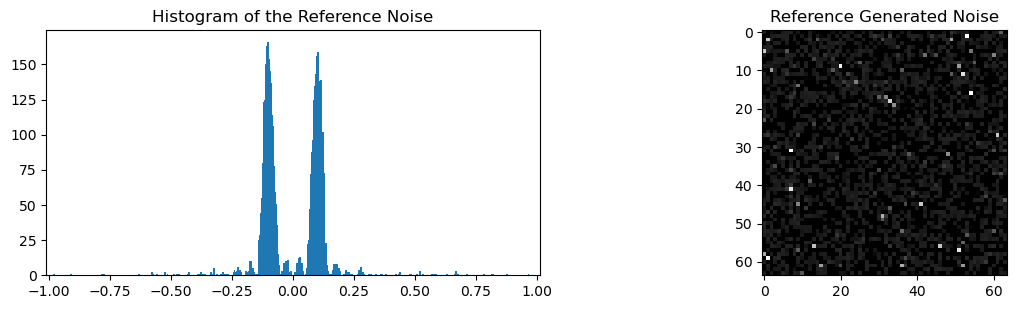

In [86]:
def noiseGenerator(noise_shape : Iterable[int], s : float) -> np.ndarray:
    """
    Parameters:
    - noise_shape : Iterable[int]
        An iterable of two positive integers. Determines the size of the
        generated noise pattern.
    - s : float
        The parameter s in the PDF of the noise. Should be a positive 
        float.
    Returns:
    - noise: np.ndarray
        The generated noise, with dtype=float64.
    """
    # ====== YOUR CODE ======
    raise NotImplementedError()

# Generating the noise
noise_shape = (64, 64)
s = 0.05
noise = noiseGenerator(noise_shape, s)
noise_ref = noiseGeneratorRef(noise_shape, s)

# Showing the results
hist, _ = np.histogram(noise, 511, (-1 - 1 / 510, 1 + 1 / 510))
hist_ref, _ = np.histogram(noise_ref, 511, (-1 - 1 / 510, 1 + 1 / 510))
plt.figure(figsize=(14, 7))
_ = plt.subplot(2, 2, 1), plt.bar(np.linspace(-1, 1, 511), hist, 1/128), plt.axis((-1.01, 1.01, 0, None)), plt.title('Histogram of the Noise')
_ = plt.subplot(2, 2, 2), plt.imshow(noise, vmin=0, vmax=1), plt.title('Generated Noise')
_ = plt.subplot(2, 2, 3), plt.bar(np.linspace(-1, 1, 511), hist_ref, 1/128), plt.axis((-1.01, 1.01, 0, None)), plt.title('Histogram of the Reference Noise')
_ = plt.subplot(2, 2, 4), plt.imshow(noise_ref, vmin=0, vmax=1), plt.title('Reference Generated Noise')

# Scratchpad
You can use this section as a scratchpad, without making a mess in the notebook. :)